# Session 13.1 - Pre-Class

## Exercise 2: Diffusion through a crack



In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# plt.xkcd()

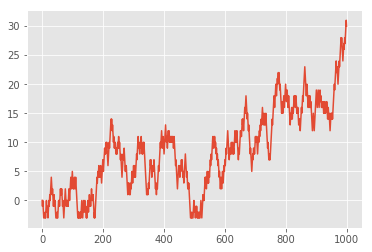

In [14]:
def diffusion_crack_a(n_steps, p_heads=0.5):
    path = [0]
    for _ in range(n_steps-1):
        if np.random.uniform() > p_heads:
            path.append(path[-1] + 1)
        else:
            path.append(path[-1] - 1)
        if path[-1] == -4:
            path[-1] = -3
    return path

n_steps = 1000
path = diffusion_crack_a(n_steps)
plt.plot(range(n_steps), path)
plt.show()

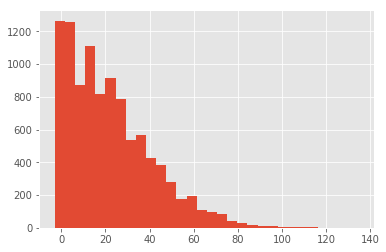

CPU times: user 7.54 s, sys: 15.7 ms, total: 7.55 s
Wall time: 7.57 s


In [22]:
%%time
end_points = []
n_steps = 1000
for i in range(10000):
    end_points.append(diffusion_crack_a(n_steps)[-1])
plt.hist(end_points, bins=30)
plt.show()

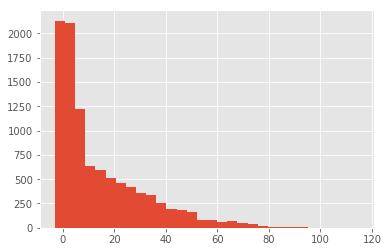

CPU times: user 8.1 s, sys: 39.7 ms, total: 8.14 s
Wall time: 8.21 s


In [21]:
%%time
def diffusion_crack_b(n_steps, p_heads=0.5, p_partial_reflect = 0.75):
    path = [0]
    for _ in range(n_steps-1):
        if path[-1] == 6:
            if np.random.uniform() > p_partial_reflect:
                path.append(7)
            else:
                path.append(5)
        else:
            if np.random.uniform() > p_heads:
                path.append(path[-1] + 1)
            else:
                path.append(path[-1] - 1)
            if path[-1] == -4:
                path[-1] = -3
        
    return path

end_points = []
n_steps = 1000
for i in range(10000):
    end_points.append(diffusion_crack_b(n_steps)[-1])
plt.hist(end_points, bins=30)
plt.show()

## Exercise 4: Wiener process / Brownian motion

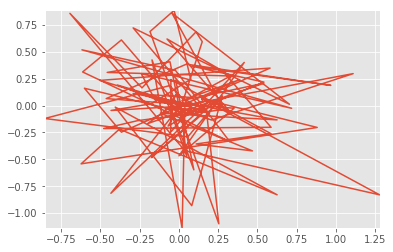

In [56]:
def wiener_process(n_steps, sd):
    path = [(0, 0)]
    for i in range(n_steps):
        theta = np.random.randint(0, 360)
        step_size = np.random.normal(0, sd)
        new_x = step_size * np.cos(np.deg2rad(theta))
        new_y = step_size * np.sin(np.deg2rad(theta))
        path.append((new_x, new_y))
    return path

def display_wiener(n_steps, sd):
    path = wiener_process(n_steps, sd)
    x_coor = [x[0] for x in path]
    y_coor = [x[1] for x in path]
    plt.plot(x_coor, y_coor)
    plt.xlim(np.min(x_coor), np.max(x_coor))
    plt.ylim(np.min(y_coor), np.max(y_coor))
    plt.show()

display_wiener(100, 0.5)

In [ ]:
path = wiener_process(n_steps, sd)
x_coor = [x[0] for x in path]
y_coor = [x[1] for x in path]
plt.plot(x_coor, y_coor)
plt.xlim(np.min(x_coor), np.max(x_coor))
plt.ylim(np.min(y_coor), np.max(y_coor))
plt.show()
display_wiener(100, 0.5)

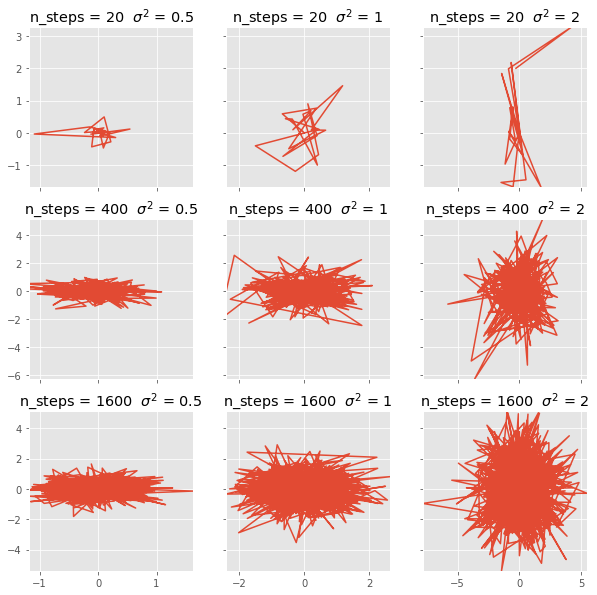

In [61]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(10, 10))

SDvalues = [0.5, 1, 2]
n_steps_values = [20, 400, 1600]

for i in range(3):
    for j in range(3):
        path = wiener_process(n_steps_values[i], SDvalues[j])
        x_coor = [x[0] for x in path]
        y_coor = [x[1] for x in path]
        ax[i, j].plot(x_coor, y_coor)
        ax[i, j].set_title(r"n_steps = {}  $\sigma^2$ = {}".format(n_steps_values[i], SDvalues[j]))
        ax[i, j].set_ylim(np.min(y_coor), np.max(y_coor))
        ax[i, j].set_xlim(np.min(x_coor), np.max(x_coor))

## Exercise 9a: Diffusion in the plane

yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
Fraction that enters the hole: 0.0


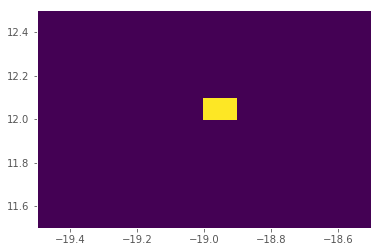

CPU times: user 82.3 ms, sys: 2.81 ms, total: 85.1 ms
Wall time: 85 ms


In [102]:
%%time
def diff_plane(n_steps):
    path = [(0, 0)]
    for i in range(n_steps):
        if np.random.uniform() < 0.25:
            path.append((path[-1][0]+1, path[-1][1]))
        elif np.random.uniform() < 0.5: 
            path.append((path[-1][0]-1, path[-1][1]))
        elif np.random.uniform() < 0.75: 
            path.append((path[-1][0], path[-1][1]+1))
        else:
            path.append((path[-1][0], path[-1][1]-1))
        if (abs(path[-1][0]) == 20) or (abs(path[-1][1]) == 20):
            return path[-2], 0
        if path[-1] in [(13, 7), (13, 8), (14, 7), (14, 8)]:
            return path[-2], 1
    return path[-1], 0

hole_number = 0
end_points = []
n_steps = 100
n_trials = 1
for i in range(n_trials):
    ep, fell = diff_plane(n_steps)
    end_points.append(ep)
    hole_number += fell

print("Fraction that enters the hole: {}".format(hole_number/n_trials))
    
ep_x_coor = [x[0] for x in end_points]
ep_y_coor = [x[1] for x in end_points]

plt.hist2d(ep_x_coor, ep_y_coor)
plt.show()

In [97]:
np.random.uniform()

0.11929996539336529